In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/iris.data')

In [ ]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


We can change the column header according to dataframe description . 

In [ ]:
df.columns = ['sepal_length'	, 'sepal_width' ,	'petal_length' , 	'petal_width'	, 'species']

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


Now Let's Deal with null values .

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Looks like it's a pretty clean Data Set . So let's build vizualisations.

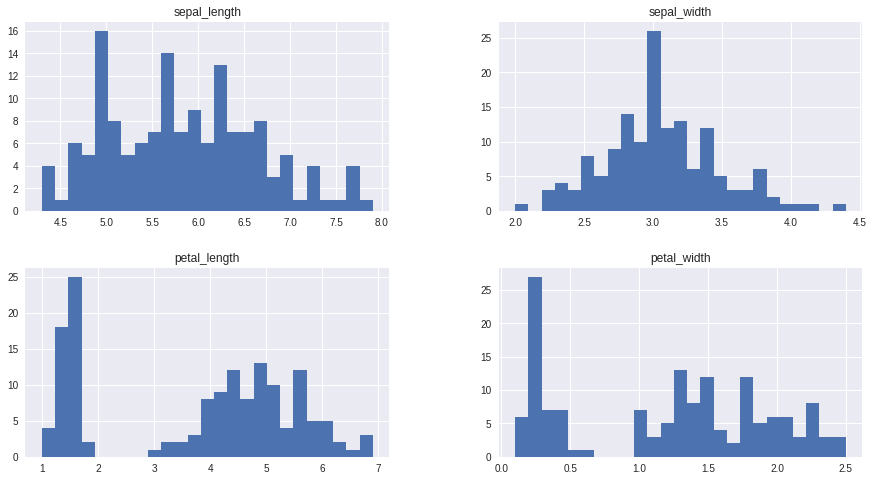

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt
df.hist(bins=25, figsize=(15,8))
plt.show()

By observing above we can decide that ,


*   The most of the sepal length is around 5
*   The most of the sepal width is around 3
*   The most of the petal length is around 1.5
*   The most of the petal width is around 0.3





In [ ]:
df.count()

sepal_length    149
sepal_width     149
petal_length    149
petal_width     149
species         149
dtype: int64

In [ ]:
corr_matrix =df.corr()
corr_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.103784,0.871283,0.816971
sepal_width,-0.103784,1.000000,-0.415218,-0.350733
petal_length,0.871283,-0.415218,1.000000,0.962314
petal_width,0.816971,-0.350733,0.962314,1.000000


No handles with labels found to put in legend.


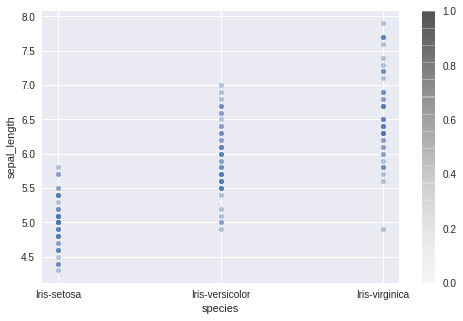

In [ ]:
df.plot(kind="scatter", x="species", y="sepal_length", alpha=0.4,
              figsize=(8,5),
              cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

No handles with labels found to put in legend.


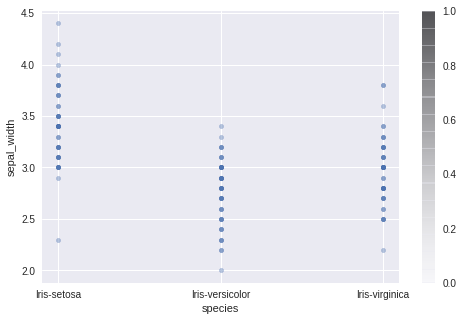

In [ ]:
df.plot(kind="scatter", x="species", y="sepal_width", alpha=0.4,
              figsize=(8,5),
              cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

In [ ]:
fig = px.scatter(data_frame = df, 
                 x="sepal_length", 
                 y="sepal_width", 
                 size = "petal_length",
                 color = "species",
                 marginal_x="histogram", 
                 marginal_y="box",width=850, height=600
                )


fig.show()

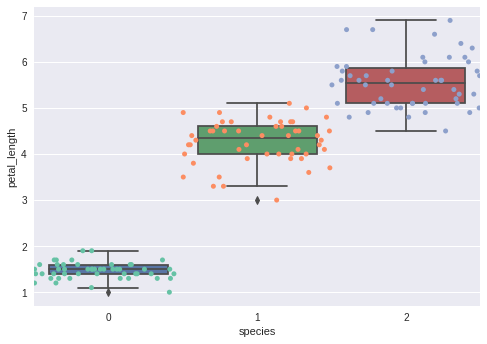

In [ ]:
ax = sns.boxplot(x="species", y="petal_length", data=df)
ax = sns.stripplot(x="species", y="petal_length", data=df , jitter=0.5 , palette="Set2", dodge=True , color=".3")

***Sepal Length Vs Sepal Width***

In [ ]:
import plotly.express as px

fig = px.scatter(df, x="sepal_length", y="sepal_width", facet_col="species",
                 width=750, height=400)

fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="lightcyan",
)

fig.show()

we can clearly see the trend of speal length vs sepal width is higher for iris_setosa . 

***Petal_length Vs Petal_width***

In [ ]:
fig = px.scatter(df, x="petal_length", y="petal_width", facet_col="species",
                 width=750, height=400)

fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="lightcyan",
)

fig.show()

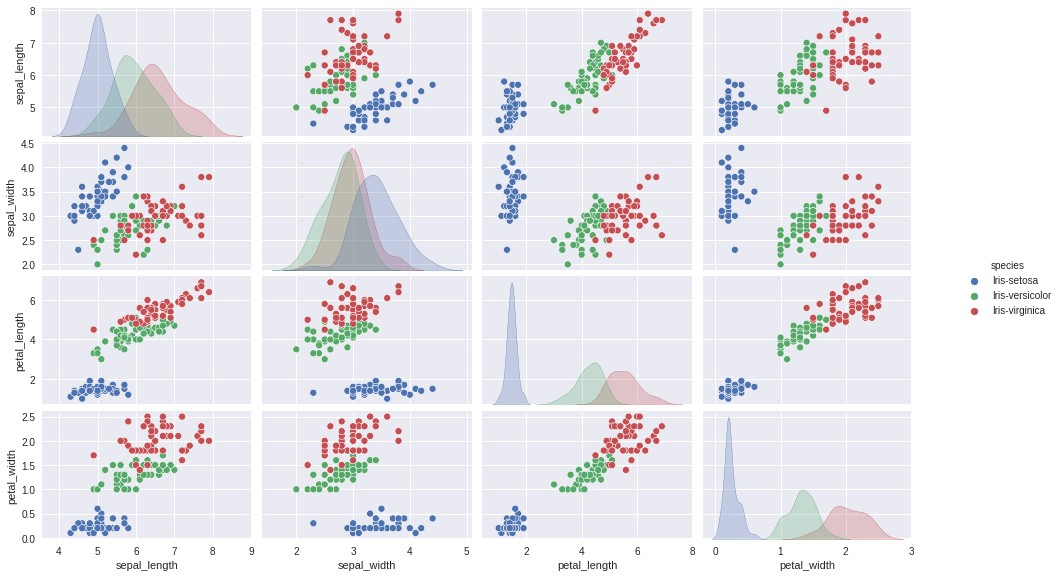

In [ ]:
import seaborn as sns
sns.pairplot(df,hue='species')
plt.style.use("seaborn")
plt.gcf().set_size_inches(15,8)
plt.show()

Let's Build our Support vector machine model from scratch . 

In [ ]:
species = {
    "species" : {"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2}
}
df.replace(species,inplace=True)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2
145,6.3,2.5,5.0,1.9,2
146,6.5,3.0,5.2,2.0,2
147,6.2,3.4,5.4,2.3,2


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [ ]:
X = df.drop('species', axis=1)
y= df.species

In [ ]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4
...,...,...,...,...
144,6.7,3.0,5.2,2.3
145,6.3,2.5,5.0,1.9
146,6.5,3.0,5.2,2.0
147,6.2,3.4,5.4,2.3


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(89, 4)
(89,)
(60, 4)
(60,)


In [ ]:
C = 1.0

In [ ]:
svc = SVC(kernel='linear', C=C).fit(x_train, y_train)
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C).fit(x_train, y_train)
poly_svc = SVC(kernel='poly', degree=3, C=C).fit(x_train, y_train)


In [ ]:
print('The accuracy of the svm classifier on training data on linear kernel is {:.2f} out of 1'.format(svc.score(x_train, y_train)))
print('The accuracy of the svm classifier on test data on linear kernel is {:.2f} out of 1'.format(svc.score(x_test, y_test)))

The accuracy of the svm classifier on training data on linear kernel is 0.99 out of 1
The accuracy of the svm classifier on test data on linear kernel is 0.98 out of 1


In [ ]:
print('The accuracy of the svm classifier on training data on rbf kernel is {:.2f} out of 1'.format(rbf_svc.score(x_train, y_train)))
print('The accuracy of the svm classifier on test data on rbf kernel is {:.2f} out of 1'.format(rbf_svc.score(x_test, y_test)))

The accuracy of the svm classifier on training data on rbf kernel is 0.99 out of 1
The accuracy of the svm classifier on test data on rbf kernel is 0.97 out of 1


In [ ]:
print('The accuracy of the svm classifier on training data on polynomial kernel is {:.2f} out of 1'.format(poly_svc.score(x_train, y_train)))
print('The accuracy of the svm classifier on test data on polynomial kernel is {:.2f} out of 1'.format(poly_svc.score(x_test, y_test)))

The accuracy of the svm classifier on training data on polynomial kernel is 0.98 out of 1
The accuracy of the svm classifier on test data on polynomial kernel is 0.95 out of 1
